# Import Libraries 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Import Datasets

In [33]:
## read_csv function to read the required CSV file
df= pd.read_csv("Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

#  Data  Cleaning 

In [34]:
# preview first 5 rows with all columns
df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [35]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [36]:
# Converting "ActivityDate" from object to datetime64
df.ActivityDate =pd.to_datetime(df.ActivityDate)

In [37]:
## checking information to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [38]:
# count distinct values of "Id"
df.Id.nunique()

33

In [39]:
# Check for missing values
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [40]:
# Check for duplicated
df.duplicated().sum()

0

In [41]:
# create new column TotalMinutes containing sum of total minutes.
df['TotalMinutes']=df.VeryActiveMinutes+ df.FairlyActiveMinutes+ df.LightlyActiveMinutes+ df.SedentaryMinutes

In [42]:
# create new column total_hours by converting to hour and round float to two decimal places
df["TotalHours"] = round(df["TotalMinutes"] / 60)

In [43]:
#  preview rows to confirm
df.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,24.0


In [44]:
# create new column "Month" 
df.rename(columns={'ActivityDate':'Date'}, inplace=True)
df['Month']=df.Date.dt.month_name()
## preview first row to confirm
df.head(1)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Month
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,18.0,April


In [45]:
# create new column "DayOfWeek" to represent day of the week
df['DayOfWeek']=df.Date.dt.day_name()
## preview first row to confirm
df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Month,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,18.0,April,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,17.0,April,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,24.0,April,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,17.0,April,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,17.0,April,Saturday


In [46]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


# Data Analysis 

In [47]:
##Find relationships in the data
df.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671,-0.048274,-0.048140
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285,-0.018152
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962,0.004523,0.003513
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313,0.002416,0.001377
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595,0.021689,0.020614
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959,0.072625,0.070989
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790,-0.085297,-0.085949
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917,-0.069207,-0.068906
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652,0.090510,0.090697
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244,-0.021064


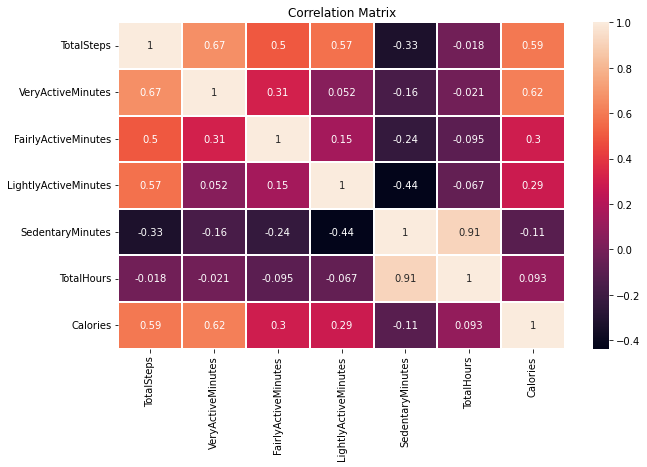

In [48]:
##The correlation between TotalSteps_SedentaryMinutes_TotalHours_Calories
# plotting Correlation Matrix
cor1=["TotalSteps","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes", "TotalHours", 
"Calories"]
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.heatmap(df[cor1].corr(),annot=True,linewidth=.4)
ax.set_title('Correlation Matrix');


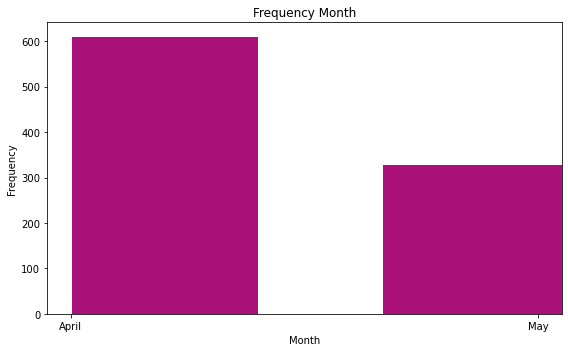

In [49]:
##frequency of FitBit app usage in terms of month
plt.figure(figsize=((8,5)))
plt.hist(df.Month,bins=3,color='#A91079',width=0.4,edgecolor = "white")

# adding annotations and visuals
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency Month')


plt.tight_layout()
plt.show()

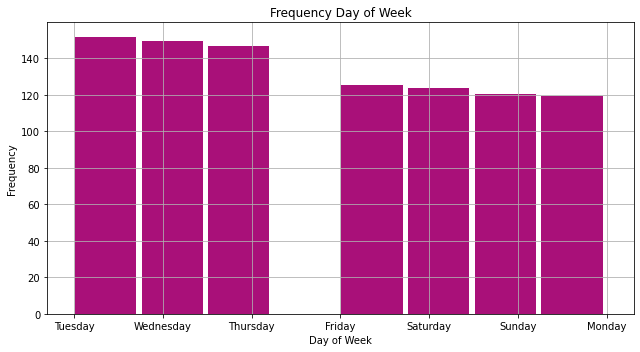

In [50]:
##frequency of FitBit app usage in terms of days of the Week

# plotting histogram
plt.figure(figsize=((9,5)))
plt.hist(df.DayOfWeek,bins=8,color='#A91079',width=0.7,edgecolor = "white")

# adding annotations and visuals
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency Day of Week')

plt.grid(True)
plt.tight_layout()
plt.show()

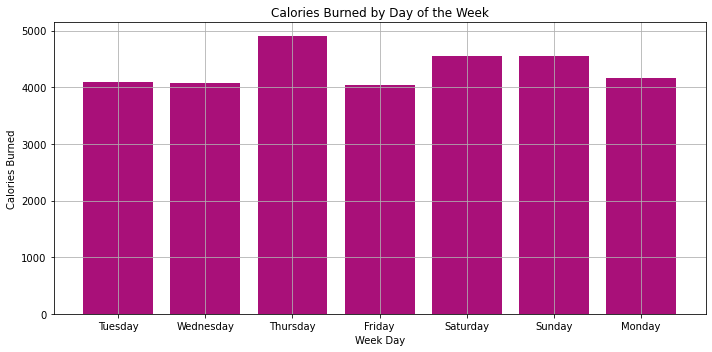

In [51]:
##The relationship between Calories Burned by Day of the Week.

# plotting bar char
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df.DayOfWeek, df.Calories, color = "#A91079")
# adding annotations and visuals
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.tight_layout()
plt.grid()
plt.show()

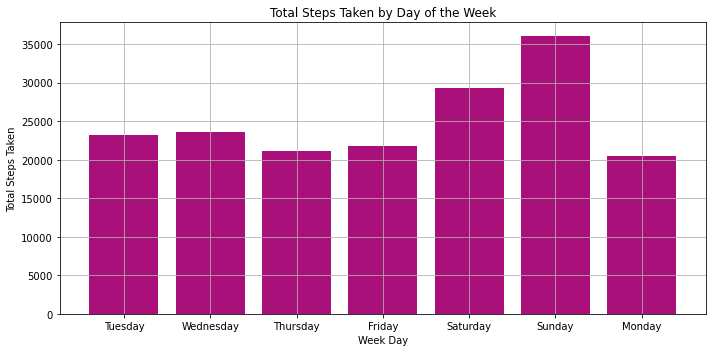

In [52]:
##The relationship between Total Steps taken by Day of the Week.

# plotting bar char
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df.DayOfWeek,df.TotalSteps, color = "#A91079")
# adding annotations and visuals
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.grid()
plt.tight_layout()
plt.show()


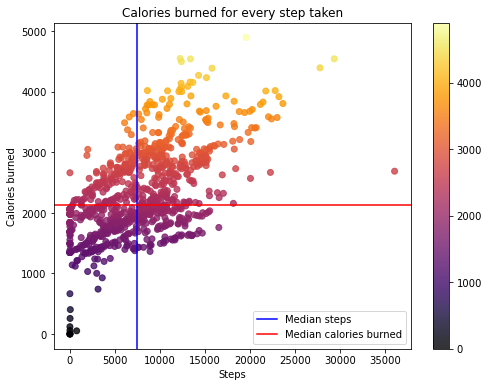

In [53]:
# plotting scatter char
plt.figure(figsize=((8,6)))
plt.scatter(df.TotalSteps,df.Calories, c =df.Calories,cmap = "inferno",alpha=.8)

median_steps=7405
median_calories=2134

plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
# adding annotations and visuals
plt.xlabel('Steps')
plt.ylabel('Calories burned')
plt.colorbar(orientation = "vertical")

plt.legend()
plt.title('Calories burned for every step taken')
#plt.tight_layout()
plt.show()

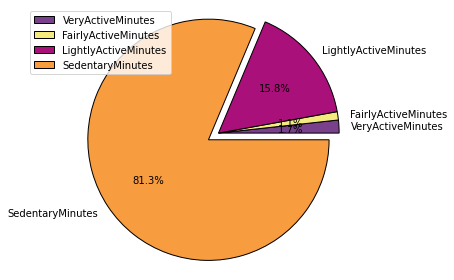

In [54]:
# calculating total of individual minutes column
VeryActiveMinutes = df.VeryActiveMinutes.sum()
FairlyActiveMinutes = df.FairlyActiveMinutes.sum()
LightlyActiveMinutes = df.LightlyActiveMinutes.sum()
SedentaryMinutes = df.SedentaryMinutes.sum()

# plotting pie chart
minutes=[VeryActiveMinutes ,FairlyActiveMinutes ,LightlyActiveMinutes ,SedentaryMinutes]
labels=['VeryActiveMinutes' ,'FairlyActiveMinutes' ,'LightlyActiveMinutes' ,'SedentaryMinutes']
colors = ["#79408B", "#F5EA7D", "#A91079", "#F89C40"]
plt.pie(minutes,labels=labels,autopct='%1.1f%%',explode=[0,0,0,0.1],colors=colors,wedgeprops = {"edgecolor": "black"})

# adding annotations and visuals
plt.legend(loc='best', labels=labels, fontsize=10)
plt.tight_layout()
plt.axis('equal') 
plt.show()

# Summary

- Use of the Bellabeat app decreased from April to May. Recommends immediately intensifying propaganda campaigns and sending stimulus notifications to address this problem

 - Users' activity increases on Saturdays followed by Tuesdays, less Sundays.The Bellabeat app can send motivational notifications to encourage users to exercise on these days with less activity.

- Stable minutes take the largest chip at 81.3%.
This indicates that users use FitBit to record daily activities such as daily commutes.
The application rarely tracks fitness in the slight percentage of fairly active activity (1.1 per cent) and very active activity (1.7 per cent).
This is dealt with by sending notifications to users about the importance of increasing daily activity and its contribution to improving overall body health and mental condition.


- Data revealed a positive relationship between the number of steps that went and the number of calories burned. These results can be shared with users to track the number of daily steps for them and to increase their eagerness to increase the number of their daily steps